<a href="https://colab.research.google.com/github/aayushkhadka303/aayushkhadka303/blob/main/utility_based_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

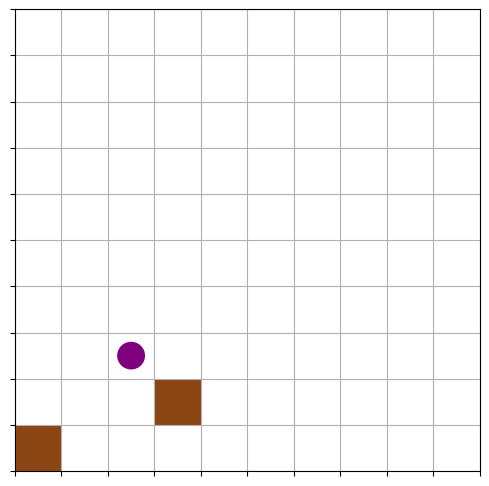

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import time
from IPython.display import clear_output

# Grid size
ROWS, COLS = 10, 10

# Random dirt generation
np.random.seed(42)
dirt_grid = (np.random.rand(ROWS, COLS) < 0.2).astype(int)

# Agent starting position
agent_pos = [5, 5]

def is_valid(r, c):
    return 0 <= r < ROWS and 0 <= c < COLS

# Manhattan distance
def manhattan(p1, p2):
    return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])

# Compute utility grid
def compute_utility():
    utility = np.zeros((ROWS, COLS))
    for r in range(ROWS):
        for c in range(COLS):
            if dirt_grid[r, c] == 1:
                utility[r, c] = 10  # Max utility for dirt
            else:
                nearest = find_nearest_dirt_from((r, c))
                utility[r, c] = -manhattan((r, c), nearest) if nearest else -100
    return utility

def find_nearest_dirt_from(start):
    from collections import deque
    visited = np.zeros((ROWS, COLS), dtype=bool)
    queue = deque()
    queue.append(start)
    visited[start[0], start[1]] = True

    while queue:
        r, c = queue.popleft()
        if dirt_grid[r, c] == 1:
            return (r, c)
        for dr, dc in [(-1,0),(1,0),(0,-1),(0,1)]:
            nr, nc = r + dr, c + dc
            if is_valid(nr, nc) and not visited[nr, nc]:
                visited[nr, nc] = True
                queue.append((nr, nc))
    return None

def draw_grid():
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(0, COLS)
    ax.set_ylim(0, ROWS)
    ax.set_xticks(np.arange(0, COLS+1, 1))
    ax.set_yticks(np.arange(0, ROWS+1, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)

    # Draw dirt
    for r in range(ROWS):
        for c in range(COLS):
            if dirt_grid[r, c] == 1:
                rect = patches.Rectangle((c, ROWS - r - 1), 1, 1, facecolor='saddlebrown')
                ax.add_patch(rect)

    # Draw agent
    ar, ac = agent_pos
    circ = patches.Circle((ac + 0.5, ROWS - ar - 0.5), 0.3, facecolor='purple')
    ax.add_patch(circ)

    plt.show()

# Simulation
steps = 0
max_steps = 200

while steps < max_steps and np.any(dirt_grid == 1):
    clear_output(wait=True)
    draw_grid()
    time.sleep(0.3)

    r, c = agent_pos
    best_utility = -float('inf')
    best_move = (r, c)  # default: stay

    utility_grid = compute_utility()

    for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
        nr, nc = r + dr, c + dc
        if is_valid(nr, nc) and utility_grid[nr, nc] > best_utility:
            best_utility = utility_grid[nr, nc]
            best_move = (nr, nc)

    # Move agent
    agent_pos = list(best_move)

    # Clean dirt
    if dirt_grid[agent_pos[0], agent_pos[1]] == 1:
        dirt_grid[agent_pos[0], agent_pos[1]] = 0

    steps += 1

clear_output(wait=True)
draw_grid()
print("Utility-based agent finished in", steps, "steps.")
